# Integrantes:
Mariana Ceballos

Federico Arango

Daniel Elorza

Luis Felipe Londoño

## Taller 2: Reducción de dimensión con PCA y tSNE

En este taller se aplicarán técnicas de reducción de dimensión para visualización de datos. Se utilizará una base de datos bastante utilizada en los cursos de Machine Learning llamada MNIST.


Importamos las librerías necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

Descargamos la base da datos

In [ ]:
mnist        = fetch_openml('mnist_784', version=1)#descargar mnist desde sklearn
mnist.target = mnist.target.astype(np.uint8)#etiquetas objetivo (clases)

X = mnist["data"]
y = mnist["target"]
print(X.shape,y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [ ]:
X = X.to_numpy()/255

(20, 784)


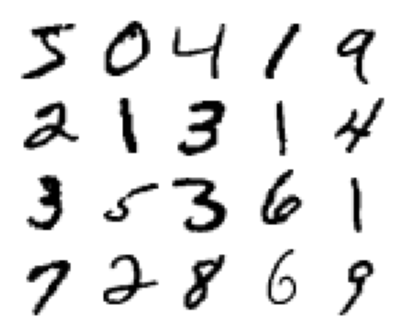

In [ ]:
def plot_digits(instances, images_per_row=5, **options):
    size           = 28
    images_per_row = min(len(instances), images_per_row)
    print(instances.shape)
    images         = [instance.reshape(size,size) for instance in instances]
    n_rows         = (len(instances) - 1) // images_per_row + 1
    row_images     = []
    n_empty        = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(111)
plot_digits(X[0:20,:])


En este ejemplo seleccionaré al azar dos columnas y 1000 muestras para hacer una gráfica. De esta forma generaré una matriz de 1000x2 para graficar en un espacio 2d. Su tarea es hacer reducción de dimensión para generar el espacio 2d utilizando PCA y tSNE. Dado que la base de datos es demasiado grande, el tiempo de cómputo de los métodos de reducción y de las gráficas puede ser alto. Les recomiendo seleccionar de forma aleatoria y estratificada 1000 muestras para hacer el ejercicio.

In [ ]:
#graficar 2D con imágenes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#img_w y img_h representan la resolución original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

In [ ]:
ind_rows = np.random.randint(X.shape[0],size = 1000)
ind_cols = np.array([128,130])
Z = X[ind_rows,:]
Z = Z[:,ind_cols]
print(Z.shape)

(1000, 2)


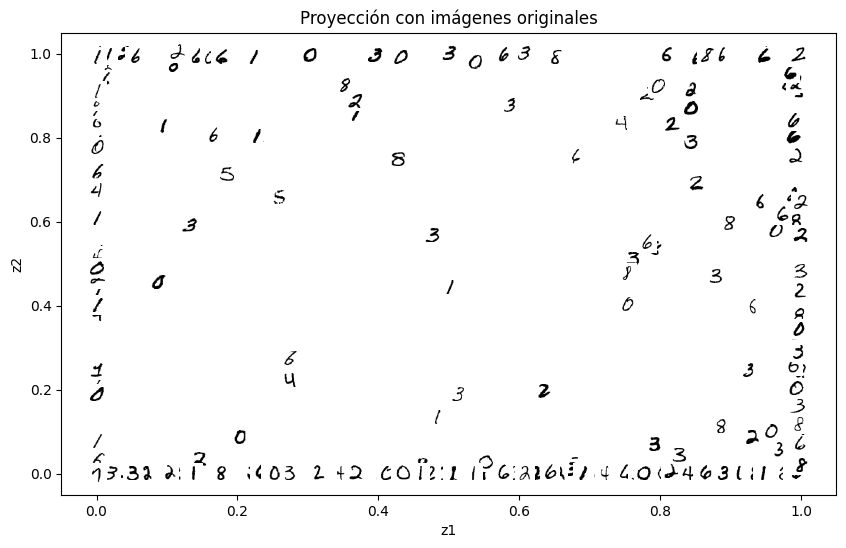

In [ ]:
plot_mnist_2d(Z,X[ind_rows,:],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Proyección con imágenes originales')
plt.show()

In [ ]:
#Selección estratificada de 1000 muestras
# Especifica el número de muestras que deseas seleccionar (1000 en este caso)
n_samples = 1000
# Divide los datos estratificadamente en conjuntos de entrenamiento y prueba
Xtrain, _, ytrain, _ = train_test_split(X, y, train_size=n_samples, stratify=y, random_state=42)

# Ahora, X_train y y_train contienen las 1000 muestras seleccionadas estratificadamente
print(Xtrain.shape)
print(ytrain.shape)
#Xtrain = ## SU CÓDIGO ACÁ

(1000, 784)
(1000,)


In [ ]:
#PCA para reducción de dimensión
# Especifica el número de componentes principales deseados (2 en este caso para una proyección 2D)
n_components = 2

# Crea una instancia de PCA
pca = PCA(n_components=n_components)

# Ajusta el PCA a tus datos de entrenamiento y transforma los datos
Zpca = pca.fit_transform(Xtrain)


######Zpca = ##SU CÓDIGO ACÁ


# Crea una instancia de t-SNE
tsne = TSNE(n_components=n_components, random_state=42)

# Ajusta t-SNE a tus datos de entrenamiento y transforma los datos
Ztsne = tsne.fit_transform(Xtrain)

#tSNE para reducción de dimensión
########Ztsne = ## SU CÓDIGO ACÁ

# Zpca ahora contiene las muestras proyectadas en el espacio 2D reducido por PCA
print(Zpca.shape)
# Ztsne ahora contiene las muestras proyectadas en el espacio 2D reducido por t-SNE
print(Ztsne.shape)


(1000, 2)
(1000, 2)


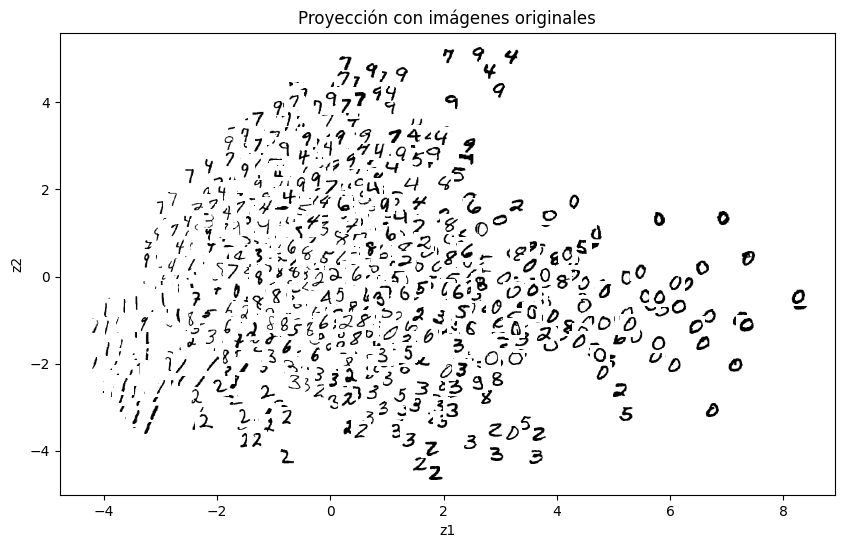

In [ ]:
#Visualización Zpca
plot_mnist_2d(Zpca,Xtrain,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Proyección con imágenes originales')
plt.show()

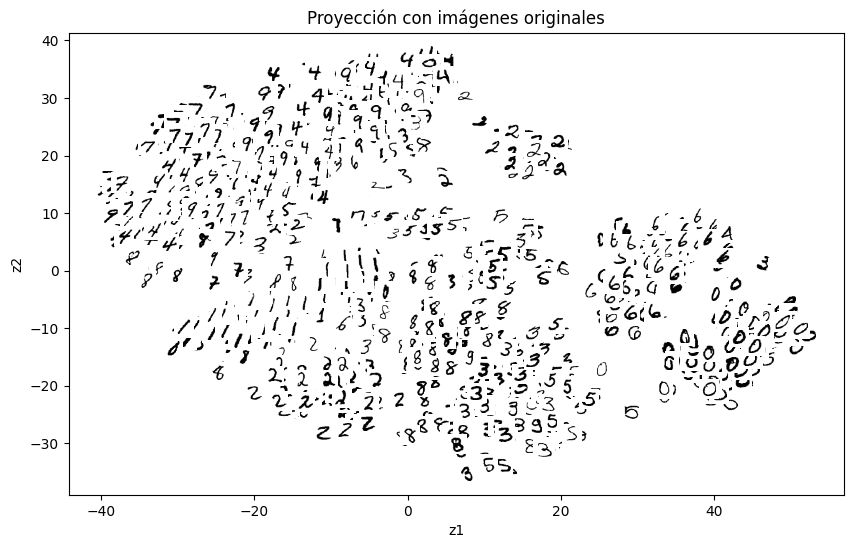

In [ ]:
#Visualización tSNE
plot_mnist_2d(Ztsne,Xtrain,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Proyección con imágenes originales')
plt.show()